In [ ]:
from tensorflow import keras
import numpy as np

(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
cnn_model = keras.models.Sequential()
#cnn layer1
cnn_model.add(keras.layers.Conv2D(10,3,activation='relu',input_shape=(28,28,1)))
#maxpooling
cnn_model.add(keras.layers.MaxPool2D((2,2)))

#cnn layer2
cnn_model.add(keras.layers.Conv2D(10,3,activation='relu',input_shape=(28,28,1)))
#maxpooling
cnn_model.add(keras.layers.MaxPool2D((2,2)))

#feed forward netwrok
cnn_model.add(keras.layers.Flatten())

cnn_model.add(keras.layers.Dense(128,activation='relu')) #hidden layer
cnn_model.add(keras.layers.Dense(256,activation='relu'))
cnn_model.add(keras.layers.Dense(256,activation='relu'))

loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss=loss,metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 10)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 128)              

In [ ]:
history = cnn_model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
1875/1875 [==============================] - 12s 4ms/step - loss: 0.3420 - accuracy: 0.9109 - val_loss: 0.1290 - val_accuracy: 0.9593
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1110 - accuracy: 0.9653 - val_loss: 0.0947 - val_accuracy: 0.9719
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0828 - accuracy: 0.9733 - val_loss: 0.0798 - val_accuracy: 0.9768
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - accuracy: 0.9793 - val_loss: 0.0817 - val_accuracy: 0.9749
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.0850 - val_accuracy: 0.9740
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0504 - accuracy: 0.9836 - val_loss: 0.0692 - val_accuracy: 0.9793
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0434 - accuracy: 0.9857 - val_loss: 0.0766 - val_accuracy

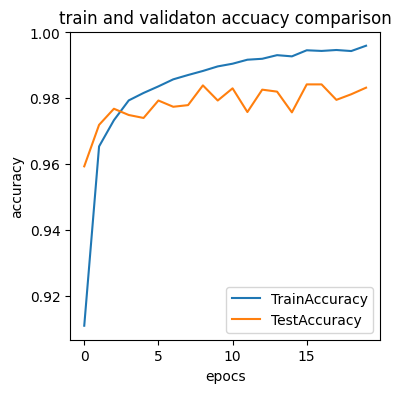

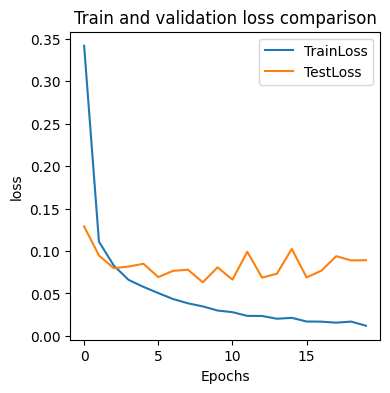

In [ ]:
   import matplotlib.pyplot as plt

plt.figure(1,(4,4))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='TestAccuracy')
plt.title('train and validaton accuacy comparison')
plt.xlabel('epocs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(2,(4,4))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'],label='TestLoss')
plt.title('Train and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()